<a href="https://colab.research.google.com/github/nxshi/IDS131F21/blob/main/ProblemSets/3a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import os
from google.colab import drive
drive.mount('/content/gdrive')
DATADIR = os.path.join('/content/gdrive/My Drive/ps3')
os.chdir(DATADIR)

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('CO2Data.csv', usecols = ['  Yr', ' Mn', '      Date', 'CO2', 'seasonally'])
df = df.set_axis(["Yr", "Mn", "Date", "CO2", 'seasonally'], axis=1)

In [ ]:
df = df[df.CO2 != -99.99]
df.head()

,Yr,Mn,Date,CO2,seasonally
2,1958,3,1958.2027,315.69,314.42
3,1958,4,1958.2877,317.45,315.15
4,1958,5,1958.3699,317.50,314.74
6,1958,7,1958.5370,315.86,315.17
7,1958,8,1958.6219,314.93,316.16


a2 = 1.5239460425803428
a1 = 307.14359015767104


Text(0, 0.5, 'CO2 concentration [ppm]')

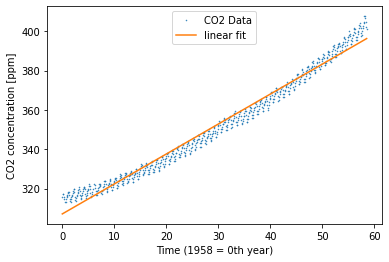

In [ ]:
x = df["Date"]-1958.2027
y = df["CO2"]

a2, a1 = np.polyfit(x, y, 1)

print('a2 = ' + str(a2))
print('a1 = ' + str(a1))


plt.plot(x, y,'.', markersize=1, label = 'CO2 Data')
plt.plot(x, a2*x + a1, label = 'linear fit')
leg = plt.legend(loc='upper center')
plt.xlabel('Time (1958 = 0th year)')
plt.ylabel('CO2 concentration [ppm]')

Text(0.5, 0, 'Time (1958 = 0th year)')

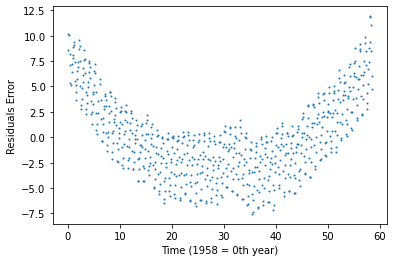

In [ ]:
plt.plot(x, y-(a2*x + a1),'.', markersize=2)
plt.ylabel('Residuals Error')
plt.xlabel('Time (1958 = 0th year)')

b3 = 0.01251704149711218
b2 = 0.788485408858901
b1 = 314.40065665426596


Text(0, 0.5, 'CO2 concentration [ppm]')

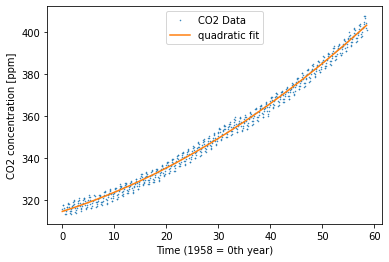

In [ ]:
b3, b2, b1 = np.polyfit(x, y, 2)

print('b3 = ' + str(b3))
print('b2 = ' + str(b2))
print('b1 = ' + str(b1))

plt.plot(x, y,'.', markersize=1, label = 'CO2 Data')
plt.plot(x, b1 + b2*x + b3*(x**2), markersize=1, label = 'quadratic fit')
leg = plt.legend(loc='upper center')
plt.xlabel('Time (1958 = 0th year)')
plt.ylabel('CO2 concentration [ppm]')

Text(0.5, 0, 'Time (1958 = 0th year)')

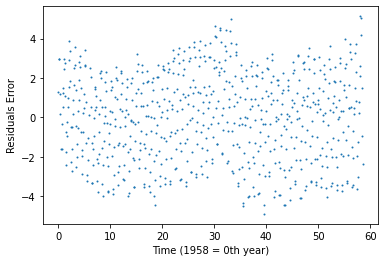

In [ ]:
plt.plot(x, y-(b1 + b2*x + b3*(x**2)),'.', markersize=2)
plt.ylabel('Residuals Error')
plt.xlabel('Time (1958 = 0th year)')

g5 = 7.980088505868795e-06
g4 = -0.00094187543946727
g3 = 0.0483571793722088
g2 = 0.31448879711941435
g1 = 315.82968814929677


Text(0, 0.5, 'CO2 concentration [ppm]')

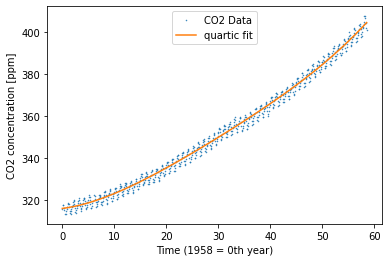

In [ ]:
g5, g4, g3, g2, g1 = np.polyfit(x, y, 4)

print('g5 = ' + str(g5))
print('g4 = ' + str(g4))
print('g3 = ' + str(g3))
print('g2 = ' + str(g2))
print('g1 = ' + str(g1))

plt.plot(x, y,'.', markersize=1, label = 'CO2 Data')
plt.plot(x, g1 + g2*x + g3*(x**2) + g4*(x**3) + g5*(x**4), markersize=1, label = 'quartic fit')
leg = plt.legend(loc='upper center')
plt.xlabel('Time (1958 = 0th year)')
plt.ylabel('CO2 concentration [ppm]')

Text(0.5, 0, 'Time (1958 = 0th year)')

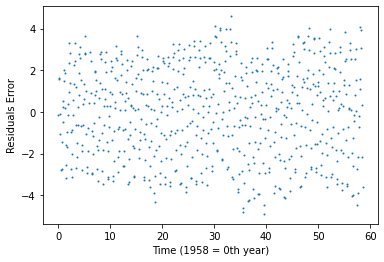

In [ ]:
plt.plot(x, y-(g1 + g2*x + g3*(x**2) + g4*(x**3) + g5*(x**4)),'.', markersize=2)
plt.ylabel('Residuals Error')
plt.xlabel('Time (1958 = 0th year)')

In [ ]:
df['F2'] = (b1 + b2*x + b3*(x**2))

In [ ]:
df['rF2'] = y-(b1 + b2*x + b3*(x**2))

In [ ]:
month_means = df.groupby('Mn').mean()

Text(0.5, 0, 'Month')

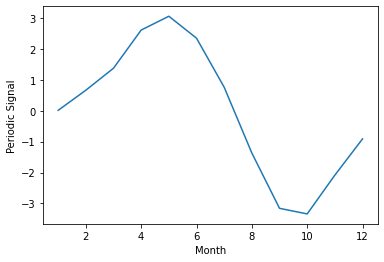

In [ ]:
plt.plot(month_means.rF2)
plt.ylabel('Periodic Signal')
plt.xlabel('Month')

In [ ]:
month_means.rF2

Mn
1     0.013090
2     0.663497
3     1.375457
4     2.610044
5     3.056832
6     2.346818
7     0.759819
8    -1.369144
9    -3.157269
10   -3.338182
11   -2.083613
12   -0.911226
Name: rF2, dtype: float64

In [ ]:
df.head()

,Yr,Mn,Date,CO2,seasonally,rF2,Seasonality,F2
2,1958,3,1958.2027,315.69,314.42,1.289343,313.025200,314.400657
3,1958,4,1958.2877,317.45,315.15,2.982232,311.857724,314.467768
4,1958,5,1958.3699,317.50,314.74,2.967159,311.476010,314.532841
6,1958,7,1958.5370,315.86,315.17,1.194354,313.905827,314.665646
7,1958,8,1958.6219,314.93,316.16,0.196611,316.102533,314.733389


In [ ]:
df['Seasonality'] = 0

In [ ]:
for i in range(1,month_means.shape[0]+1):
  print(i)
  print(month_means.rF2[i])
  df.loc[df.Mn == i, 'Seasonality'] = df.loc[df.Mn == i, 'F2']+ month_means.rF2[i]

1
0.013090373523507894
2
0.6634967521353099
3
1.3754569636246778
4
2.6100439805591122
5
3.056831681583218
6
2.346817955240534
7
0.7598189303367233
8
-1.3691435428835714
9
-3.1572692969844023
10
-3.3381821978388926
11
-2.0836134031286067
12
-0.9112261826808179


In [ ]:
df.head()

,Yr,Mn,Date,CO2,seasonally,rF2,Seasonality,F2
2,1958,3,1958.2027,315.69,314.42,1.289343,315.776114,314.400657
3,1958,4,1958.2877,317.45,315.15,2.982232,317.077812,314.467768
4,1958,5,1958.3699,317.50,314.74,2.967159,317.589673,314.532841
6,1958,7,1958.5370,315.86,315.17,1.194354,315.425465,314.665646
7,1958,8,1958.6219,314.93,316.16,0.196611,313.364246,314.733389


Text(0, 0.5, 'CO2 concentration [ppm]')

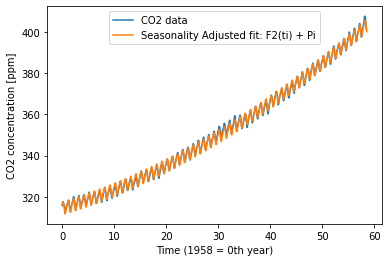

In [ ]:
plt.plot(x, df.CO2, markersize=2, label = 'CO2 data')
plt.plot(x, df.Seasonality, markersize=2, label = 'Seasonality Adjusted fit: F2(ti) + Pi')
leg = plt.legend(loc='upper center')
plt.xlabel('Time (1958 = 0th year)')
plt.ylabel('CO2 concentration [ppm]')

Text(0.5, 0, 'Time (1958 = 0th year)')

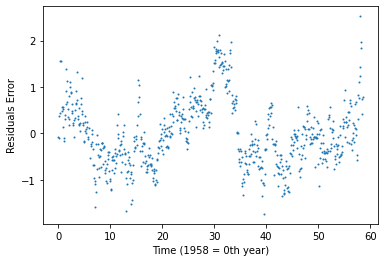

In [ ]:
plt.plot(x, df.CO2-df.Seasonality, '.', markersize=2)
plt.ylabel('Residuals Error')
plt.xlabel('Time (1958 = 0th year)')

Text(0, 0.5, 'CO2 concentration [ppm]')

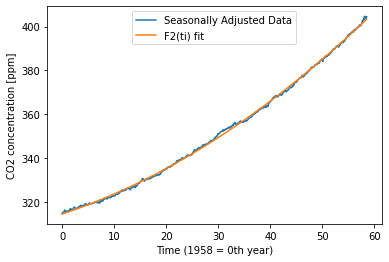

In [ ]:
plt.plot(x, df.seasonally, markersize=2, label = 'Seasonally Adjusted Data')
plt.plot(x, df.F2, markersize=2, label = 'F2(ti) fit')
leg = plt.legend(loc='upper center')
plt.xlabel('Time (1958 = 0th year)')
plt.ylabel('CO2 concentration [ppm]')

Text(0.5, 0, 'Time (1958 = 0th year)')

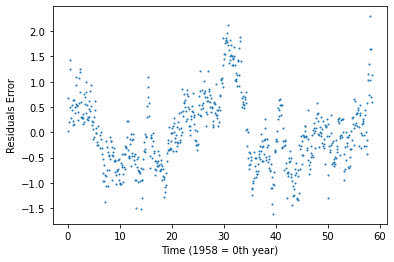

In [ ]:
plt.plot(x, df.seasonally-df.F2, '.', markersize=2)
plt.ylabel('Residuals Error')
plt.xlabel('Time (1958 = 0th year)')

Text(0, 0.5, 'CO2 concentration [ppm]')

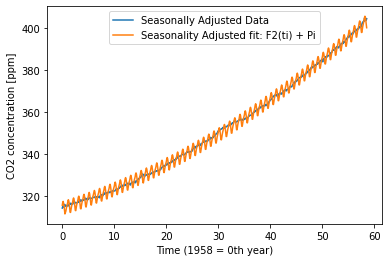

In [ ]:
plt.plot(x, df.seasonally, markersize=2, label = 'Seasonally Adjusted Data')
plt.plot(x, df.Seasonality, markersize=2, label = 'Seasonality Adjusted fit: F2(ti) + Pi')
leg = plt.legend(loc='upper center')
plt.xlabel('Time (1958 = 0th year)')
plt.ylabel('CO2 concentration [ppm]')

Text(0.5, 0, 'Time (1958 = 0th year)')

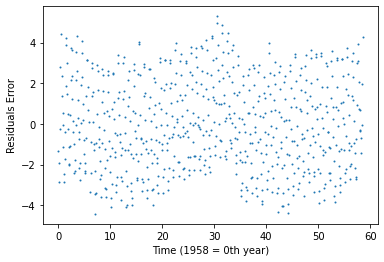

In [ ]:
plt.plot(x, df.seasonally-df.Seasonality, '.', markersize=2)
plt.ylabel('Residuals Error')
plt.xlabel('Time (1958 = 0th year)')